# Preparation
#### Import packages
#### Import data file HelocData.csv from web to data frame named **data**
#### Transform value [-7,-8,-9] to NaN when reading csv file
#### Check the missing value frequency for each of the variables and impute the missing values by the mean of observed values

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

missing_value = [-7, -8, -9]
data = pd.read_csv('http://www.statsoft.org/wp-content/uploads/2019Stat3612SML/Assignments/HelocData.csv',
                   na_values=missing_value)

data.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
1,Bad,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,36.0,...,27.0,4.0,3.0,3.0,80.0,53.0,17.0,3.0,12.0,83.0
2,Good,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,Good,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,Bad,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0


#### Calculate the missing value frequencies separately for each feature

In [14]:
missing_frequency=data.isna().sum()/ len(data)
print(missing_frequency)

RiskFlag    0.000000
x1          0.057176
x2          0.079071
x3          0.056220
x4          0.056220
x5          0.056220
x6          0.056220
x7          0.056220
x8          0.056220
x9          0.518979
x10         0.056220
x11         0.056220
x12         0.056220
x13         0.056220
x14         0.056220
x15         0.279090
x16         0.056220
x17         0.056220
x18         0.074003
x19         0.383115
x20         0.071135
x21         0.138541
x22         0.111961
x23         0.057941
dtype: float64


#### Visualize the result by a bar chart



<BarContainer object of 23 artists>

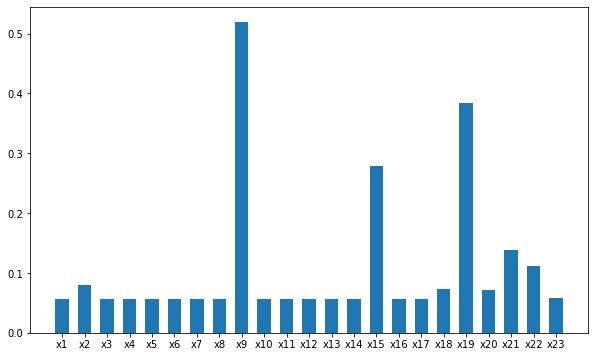

In [15]:
plt.figure(figsize=(10,6))
plt.bar(list(data)[1:],missing_frequency[1:],width = 0.6)

#### Use np.random.seed toset date as the random seed, then split the data into training (80%) and testing (20%) sets

In [17]:
np.random.seed(201909)
df_train,df_test = train_test_split(data,test_size=0.2)
df_train.head(5)

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
9442,Good,69.0,243.0,2.0,89.0,32.0,0.0,0.0,100.0,NaN,...,30.0,NaN,0.0,0.0,45.0,77.0,9.0,4.0,3.0,59.0
4196,Good,88.0,227.0,5.0,91.0,13.0,0.0,0.0,100.0,NaN,...,15.0,4.0,1.0,1.0,1.0,NaN,1.0,NaN,0.0,25.0
824,Good,85.0,273.0,4.0,109.0,29.0,0.0,0.0,100.0,NaN,...,17.0,0.0,0.0,0.0,1.0,NaN,4.0,1.0,0.0,43.0
5378,Bad,57.0,119.0,7.0,7.0,3.0,0.0,0.0,100.0,NaN,...,0.0,NaN,8.0,6.0,84.0,NaN,3.0,NaN,1.0,100.0
9246,Good,90.0,100.0,57.0,98.0,7.0,0.0,0.0,100.0,NaN,...,0.0,NaN,0.0,0.0,9.0,NaN,2.0,NaN,0.0,50.0


#### For each feature variable in the training data, impute the missing values by the mean of observed values.
#### The modified data frame is stored in data frame df_train_cp 

In [18]:
df_train_cp=df_train.copy()

for i in range(1,24):
    imp = SimpleImputer(missing_values= np.nan , strategy='mean')
    imp.fit(df_train_cp['x' + str(i)][:,np.newaxis])
    df_train_cp['x' + str(i)] = imp.transform(df_train_cp['x' + str(i)][:,np.newaxis])
df_train_cp.head(5)

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
9442,Good,69.0,243.0,2.0,89.0,32.0,0.0,0.0,100.0,21.558561,...,30.0,2.404362,0.0,0.0,45.0,77.000000,9.0,4.000000,3.0,59.0
4196,Good,88.0,227.0,5.0,91.0,13.0,0.0,0.0,100.0,21.558561,...,15.0,4.000000,1.0,1.0,1.0,68.750725,1.0,2.489946,0.0,25.0
824,Good,85.0,273.0,4.0,109.0,29.0,0.0,0.0,100.0,21.558561,...,17.0,0.000000,0.0,0.0,1.0,68.750725,4.0,1.000000,0.0,43.0
5378,Bad,57.0,119.0,7.0,7.0,3.0,0.0,0.0,100.0,21.558561,...,0.0,2.404362,8.0,6.0,84.0,68.750725,3.0,2.489946,1.0,100.0
9246,Good,90.0,100.0,57.0,98.0,7.0,0.0,0.0,100.0,21.558561,...,0.0,2.404362,0.0,0.0,9.0,68.750725,2.0,2.489946,0.0,50.0


# Variable Selection
#### For the training data, draw the boxplot for each feature variable as grouped by RiskFlag
#### By comparing the boxplot of each variable, 5 out of 23 variables are chosen:

#### Chosen features: x1,x10,x11,x13,x22
####  Reasons:
    1.features x9, x15 and x19 are excluded for having too many missing value as plotted above
    2.features x2, x3, x4, x5, x6,x7, x8, x12, x14, x16,x17, x18, x20,x21 are excluded since the mean values for the good/bad groups are close to each other and there are a lot of outliers.
    3.feature x23 is not chosen because the variance is quite large
    4.the selected 5 features have relatively less outliers and more separated boxes ( including Q1, mean and Q3 ) between good and bad group.

/Users/zhangxinyi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/Users/zhangxinyi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/Users/zhangxinyi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained u

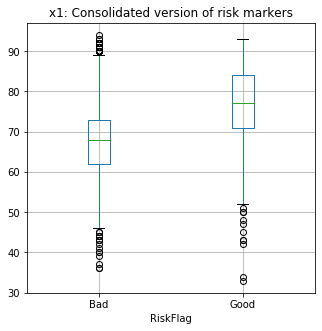

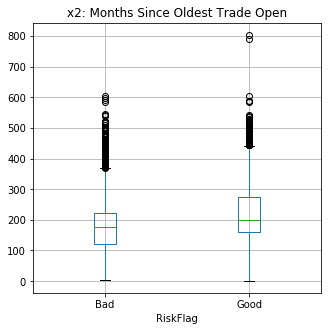

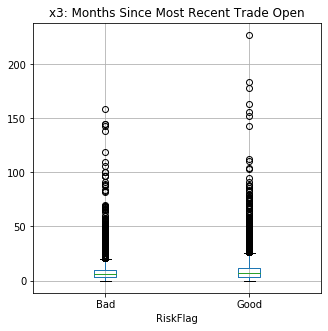

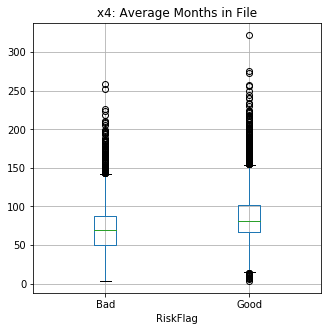

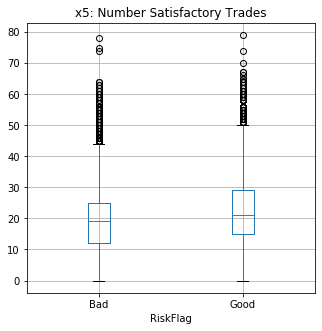

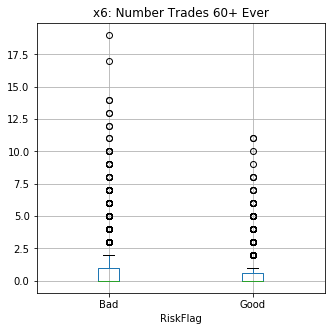

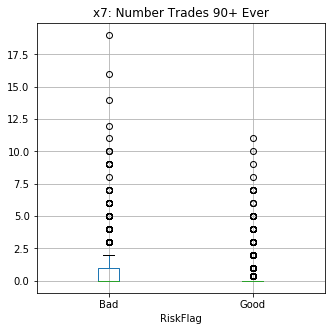

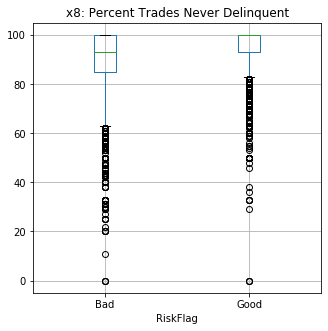

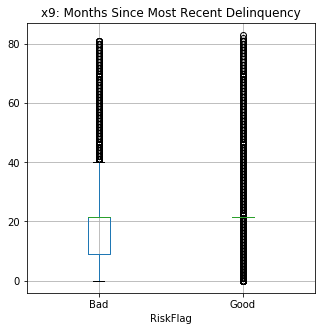

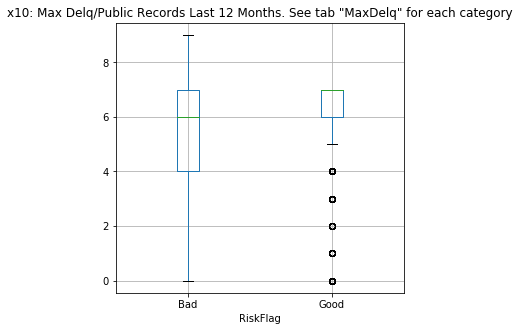

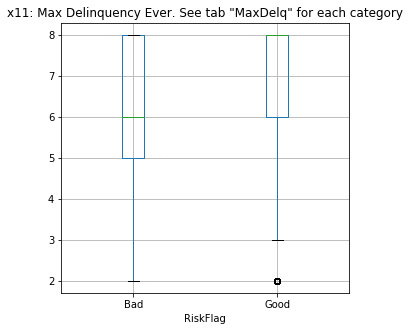

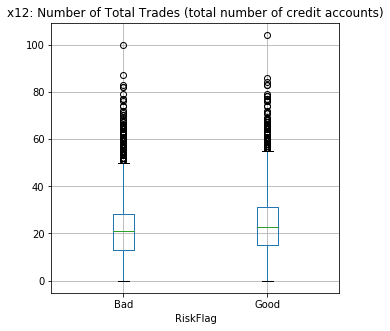

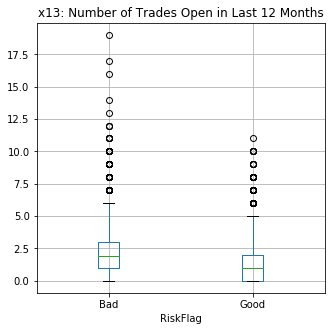

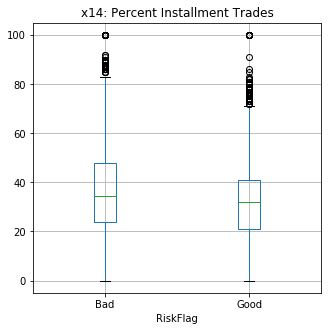

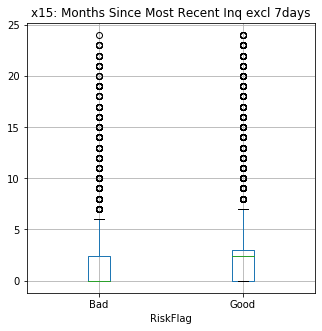

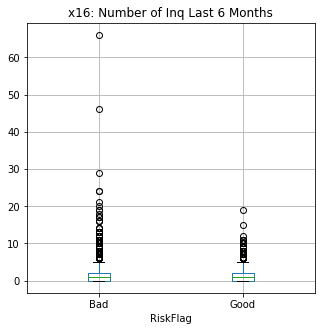

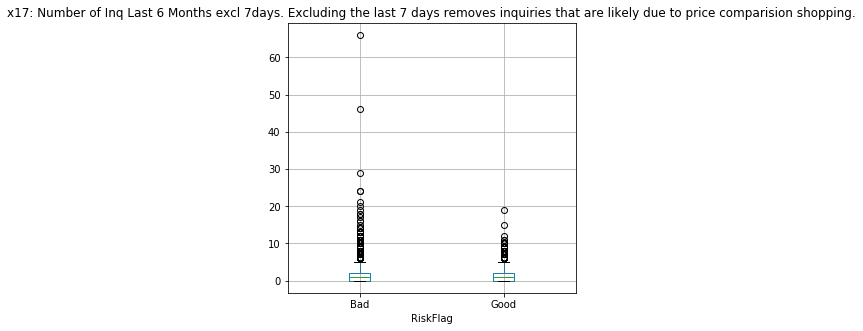

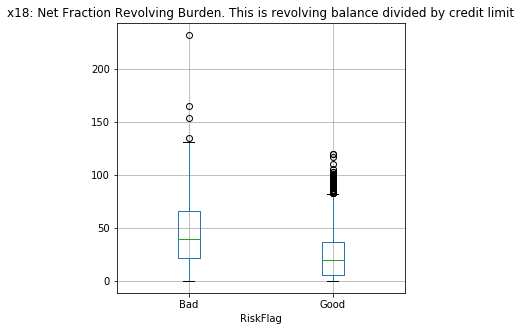

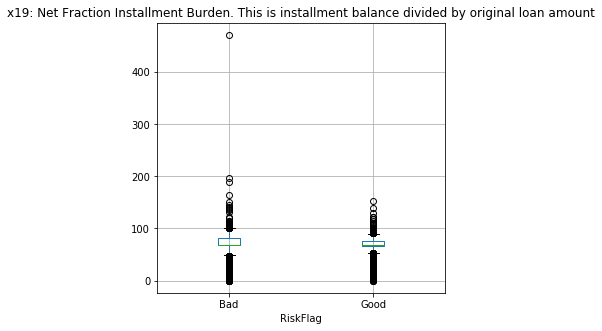

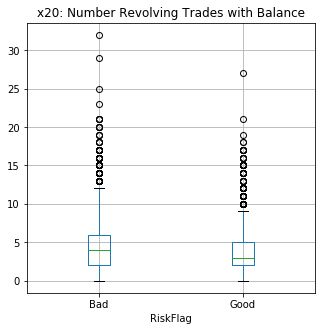

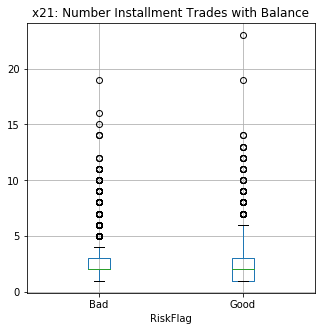

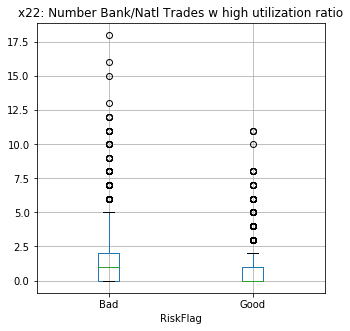

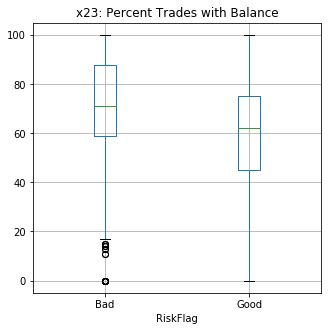

In [19]:
#draw the boxplots for each variable
#Subtitles of boxplots are modified accourding to the Data Dictionary Description

Dict = pd.read_csv("Dict.csv")
Dict.iloc[i,1]
for i in range(1 ,24):
    boxplot = df_train_cp.boxplot(column ='x' + str(i), by='RiskFlag',figsize = (5,5))
    boxplot.get_figure().suptitle('')
    boxplot.get_figure().gca().set_title('x' + str(i)+': '+Dict.iloc[i,1])
    


In [20]:
#drop the excluded features in df_train_cp dataframe
dropList=[2,3,4,5,6,7,8,9,12,14,15,16,17,18,19,20,21,23]

for i in dropList:
        df_train_cp.drop('x'+str(i), axis=1, inplace=True)
# generate the x_train and y_train
x_train = df_train_cp.iloc[:,1:].values
y_train = df_train_cp.iloc[:,0].values

In [21]:
#drop the excluded features in df_test_cp dataframe
#impute the missing values by the mean of observed values
#generate the x_test and y_test
df_test_cp=df_test.copy()

for i in range(1,24):
    imp = SimpleImputer(missing_values= np.nan , strategy='mean')
    imp.fit(df_test_cp['x' + str(i)][:,np.newaxis])
    df_test_cp['x' + str(i)] = imp.transform(df_test_cp['x' + str(i)][:,np.newaxis])
df_test_cp.head(5)

dropList=[2,3,4,5,6,7,8,9,12,14,15,16,17,18,19,20,21,23]

for i in dropList:
        df_test_cp.drop('x'+str(i), axis=1, inplace=True)
    
x_test = df_test_cp.iloc[:,1:].values
y_test = df_test_cp.iloc[:,0].values

# Model Fitting
#### Given the responding variable "Risk Flag" is binary in natural (Good or Bad),
#### fit a logistic model on the training data with selected features

In [22]:
logreg = LogisticRegression(C=1e8, solver='newton-cg')
logreg.fit(x_train, y_train)

y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

# The fitted model has the coefficients of:
print("Coefficients :", np.round(logreg.intercept_,4), np.round(logreg.coef_,4))

Coefficients : [-8.0317] [[ 0.1139 -0.0488  0.0009  0.0174 -0.0378]]


In [23]:
#Fit the logistic model by package LogisticRegression statsmodels.api for summary
#change the categorical variable RiskFlag into 0 and 1 as required by the package 
df2=df_train_cp.copy()
df2.RiskFlag.replace(to_replace=['Bad'],value=0,inplace=True)
df2.RiskFlag.replace(to_replace=['Good'],value=1,inplace=True)
# generate the x_train and y_train
x_train2 = df2.iloc[:,1:].values
y_train2 = df2.iloc[:,0].values
X1 = sm.add_constant(x_train2)
logreg2 = sm.Logit(y_train2,X1).fit()
print(logreg2.summary())

'''
Rank-order the variable importance based on the Wald tests.
according to the printed summary, the selected variables are ranked by the wald tests results(z-score)
z(x1)>z(x2)>z(x5)>z(x4)>z(x3)
converting to the original variables (x1,x10,x11,x13,x22) :
x1>x10>x22>x13>x11
at 95% confidence level, only the first two variables(x1 and 10) are significant'''


Optimization terminated successfully.
         Current function value: 0.583184
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8361
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Nov 2019   Pseudo R-squ.:                  0.1573
Time:                        02:54:06   Log-Likelihood:                -4879.5
converged:                       True   LL-Null:                       -5790.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0317      0.267    -30.102      0.000      -8.555      -7.509
x1             0.1139      0.

'\nRank-order the variable importance based on the Wald tests.\naccording to the printed summary, the selected variables are ranked by the wald tests results(z-score)\nz(x1)>z(x2)>z(x5)>z(x4)>z(x3)\nconverting to the original variables (x1,x10,x11,x13,x22) :\nx1>x10>x22>x13>x11\nat 95% confidence level, only the first two variables(x1 and 10) are significant'

# Model Intepretation
#### 1. The coefficient of "x1:Consolidated version of risk markers" is 0.1139 with the standard error of 0.004, which suggested that a higher score in "x1:Consolidated version of risk markers" indicates a higher probability of having a "Good" risk flag.
#### 2. The coefficient of "x10:Max Delq/Public Records Last 12 Months" is -0.0488 with the standard error of 0.022, which suggested that a higher score in "x10:Max Delq/Public Records Last 12 Months"(deliquent in the short term) indicates a higher probability of having a "Bad" risk flag.
#### 3. At 95% confidence level, only the first two variables(x1 and 10) are statistically significant. Thus, "x11":"Max Delinquency Ever. ","x13":"Number of Trades Open in Last 12 Months","x22":"Number Bank/Natl Trades w high utilization ratio" has limited effect on predicting the probability of the risk flag
#### 4. Pseudo R-squ.: 0.1573 indicats that the selected variables have limited power in explain the variability of the risk flag

# Model Testing

#### Test the fitted model's performance on the testing data and report the prediction accuracy.

In [24]:
# accuracy score 
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on the training set =', np.round(accuracy_train,4))
print('Accuracy on the test set =', np.round(accuracy_test,4))
print(classification_report(y_test,y_pred_test))

Accuracy on the training set = 0.6991
Accuracy on the test set = 0.7003
              precision    recall  f1-score   support

         Bad       0.69      0.76      0.72      1079
        Good       0.71      0.63      0.67      1013

    accuracy                           0.70      2092
   macro avg       0.70      0.70      0.70      2092
weighted avg       0.70      0.70      0.70      2092

